In [1]:
import numpy as np
import pandas as pd
import os
import glob

In [2]:
root_dir = f'/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8oe4_BC_scaffolding/8oe4_BC_XMPNN_scaffold'
folders = glob.glob(os.path.join(root_dir, 'traj*'))
print(folders)

['/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj1_3758', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj2_4304', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj2_1676', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj2_3121', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj1_1833', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj2_445', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/XMPNN_output/traj2_3313', '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/design

In [2]:
def parse_XMPNN_seqs(folder):
    """
    Parse the XMPNN sequences from the given folder.
    """
    XMPNN_data = {}
    if not os.path.exists(folder):
        raise FileNotFoundError(f"Folder {folder} does not exist.")
    for subfolder in os.listdir(folder):
        if not os.path.isdir(os.path.join(folder, subfolder)):
            continue
        data_fpath = os.path.join(folder, subfolder, 'seqs', f"{subfolder}.fa")
        if os.path.exists(data_fpath):
            XMPNN_data.update(parse_XMPNN_fasta(data_fpath))
        else:
            print(f"Warning: {data_fpath} does not exist. Skipping this file.")
    return XMPNN_data

def parse_XMPNN_fasta(fasta_file):
    """
    Parse a FASTA file and return a dictionary of sequences.
    """
    fa_data = {}
    basename = os.path.basename(fasta_file).replace('.fa', '')
    with open(fasta_file, 'r') as f:
        lines = f.readlines()
        #lines = lines[2:] # Skip the first two lines, the original sequence
        for i in range(0, len(lines), 2):
            header = lines[i].strip().lstrip('>').split(',')
            header_data = {string.strip().split('=')[0]: string.strip().split('=')[1] for string in header if '=' in string}
            seq = lines[i + 1].strip()
            header_data['seq'] = seq
            header_data['batch'] = basename
            header_data['design'] = f'{basename}_{i // 2}'
            fa_data[f'{basename}_{i // 2}'] = header_data
    return fa_data

In [3]:
XMPNN_data = parse_XMPNN_seqs('/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/5mj4_RF_scaffolding/5mj4_RF_XMPNN_output')
# Convert the dictionary to a DataFrame
XMPNN_df = pd.DataFrame.from_dict(XMPNN_data, orient='index').reset_index(drop=True)
XMPNN_df['length'] = XMPNN_df['seq'].apply(len)
print(f"Parsed {len(XMPNN_df)} sequences from XMPNN data.")
print(f"Parsed {len(XMPNN_df['batch'].unique())} unique Backbones.")
display(XMPNN_df.head())
XMPNN_df = XMPNN_df.drop_duplicates(subset=['seq'])
print(f"XMPNN DataFrame shape: {XMPNN_df.shape}")

# Save the DataFrame to a CSV file
save_dir = "/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/5mj4_RF_scaffolding/"
output_csv = os.path.join(save_dir, 'XMPNN_redesign_seqs.csv')
XMPNN_df.to_csv(output_csv, index=False)

Parsed 3976000 sequences from XMPNN data.
Parsed 8000 unique Backbones.


,score,global_score,fixed_chains,designed_chains,model_name,git_hash,seed,seq,batch,design,T,sample,seq_recovery,length
0,2.3985,1.8672,['B'],['A'],epoch90_step311110,86929e17907de4089c51ab11be30ece7f4e6f0ec,6707,GGGGQKEIAQIQAVIAGIQKYIYTMGGGGGGGGGGGGGQIAAIQEQ...,traj1_3758,traj1_3758_0,NaN,NaN,NaN,59
1,1.0234,1.4807,NaN,NaN,NaN,NaN,NaN,EEEAEREIANLEAVRAGLEAYAERHGVSLRLPAPTDYASLPEEQQQ...,traj1_3758,traj1_3758_1,0.1,1,0.2881,59
2,1.0366,1.5091,NaN,NaN,NaN,NaN,NaN,EEEAQKEIENIRAVRAGLEAYAKTIGLEVTLPEPVSFESIPQDQQE...,traj1_3758,traj1_3758_2,0.1,2,0.3390,59
3,1.0270,1.4995,NaN,NaN,NaN,NaN,NaN,EEEAEREIEQLRAVRAGIEAYLKTIGIELTLPEPTSAEALPEEQAR...,traj1_3758,traj1_3758_3,0.1,3,0.3051,59
4,1.0353,1.4916,NaN,NaN,NaN,NaN,NaN,SAAAEREIAQLEAVRAGIEAYLETIGVTLTLPAPVDAASLPAEQAE...,traj1_3758,traj1_3758_4,0.1,4,0.3559,59


XMPNN DataFrame shape: (3968189, 14)


In [4]:
# pick all 0-th design from each batch
XMPNN_df_0th = XMPNN_df[XMPNN_df['design'].str.endswith('_0')]
print(f"Parsed {len(XMPNN_df_0th)} 0-th design sequences from XMPNN data.")

# from the rest sequences, pick top 200 sequences in each batch with lowest score
num_pick_per_batch = 50
XMPNN_df_rest = XMPNN_df[~XMPNN_df['design'].str.endswith('_0')]
XMPNN_df_rest['score'] = XMPNN_df_rest['score'].astype(float)
final_grouped_table = XMPNN_df_rest.groupby("batch").apply(
    lambda x: x.nsmallest(num_pick_per_batch, "score")
).reset_index(drop=True)

# Combine the 0-th design sequences with the selected top sequences
final_df = pd.concat([XMPNN_df_0th, final_grouped_table], ignore_index=True)
print(f"Final DataFrame contains {len(final_df)} sequences after combining 0-th designs and top selections.")

# split and Save the final DataFrame to 4 CSV files
save_dir = "/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8oe4_BC_scaffolding"
os.makedirs(save_dir, exist_ok=True)

num_files = 6
chunk_size = len(final_df) // num_files + 1
for i in range(num_files):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(final_df))
    chunk_df = final_df.iloc[start_idx:end_idx]
    chunk_df.to_csv(os.path.join(save_dir, f'XMPNN_scaffold_chunk_{i + 1}.csv'), index=False)
    print(f"Saved chunk {i + 1} with {len(chunk_df)} sequences.")

Parsed 470 0-th design sequences from XMPNN data.


/var/folders/g5/s542dywn3qz_8z2thdskl3hc0000gn/T/ipykernel_90036/2133412654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XMPNN_df_rest['score'] = XMPNN_df_rest['score'].astype(float)


Final DataFrame contains 23970 sequences after combining 0-th designs and top selections.
Saved chunk 1 with 2997 sequences.
Saved chunk 2 with 2997 sequences.
Saved chunk 3 with 2997 sequences.
Saved chunk 4 with 2997 sequences.
Saved chunk 5 with 2997 sequences.
Saved chunk 6 with 2997 sequences.
Saved chunk 7 with 2997 sequences.
Saved chunk 8 with 2991 sequences.


In [5]:
XMPNN_df_L50 = XMPNN_df[XMPNN_df['length'] <= 50]
XMPNN_df_M50 = XMPNN_df[(XMPNN_df['length'] > 50) & (XMPNN_df['length'] <= 80)]
print(f"Parsed {len(XMPNN_df_L50)} sequences with length <= 50.")
print(f"Parsed {len(XMPNN_df_M50)} sequences with length > 50 and <= 80.")
XMPNN_df.to_csv('/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/8OE4_RF_scaffolding/IL23_3D85_XMPNN.csv')

Parsed 9408 sequences with length <= 50.
Parsed 470592 sequences with length > 50 and <= 80.


In [7]:
def select_topBB_design(filepath, top_N: int = 200, pick_strategy: str = 'top', num_pick_per_batch: int = 1, save_slice: int=1) -> pd.DataFrame:
    '''
    Select the top-ranked designs from the MPNN scoring results.
    Args:
        ws: Workspace object
        top_N: Number of top-ranked designs to select
        pick_strategy: Strategy to pick the representative design from each group
        num_pick_per_batch: Number of designs to pick from each group
    Returns:
        pd.DataFrame: DataFrame containing (top_N * num_pick_per_batch) designs
    '''
    BB_df = pd.read_csv(filepath)
    BB_df['length'] = BB_df['seq'].apply(len)

    BB_grouped = BB_df.groupby("batch")["score"].mean().reset_index()
    BB_grouped_sorted = BB_grouped.sort_values(by="score", ascending=True)
    top_designs = BB_grouped_sorted.head(top_N)

    '''BB_GS_L50 = BB_df[BB_df["length"] <= 50].groupby("batch")["score"].mean().reset_index()
    BB_GS_M50 = BB_df[BB_df["length"] > 50].groupby("batch")["score"].mean().reset_index()
    top_designs = pd.concat([BB_GS_L50.head(top_N//2), BB_GS_M50.head(top_N//2)])'''

    representative_designs = BB_df[BB_df["batch"].isin(top_designs["batch"])]
    # For each group, pick the top-ranked entry as the representative design
    if pick_strategy == 'top':
        final_grouped_table = representative_designs.groupby("batch").apply(
            lambda x: x.nsmallest(num_pick_per_batch, "score")
        ).reset_index(drop=True)
    elif pick_strategy == 'random':
        final_grouped_table = representative_designs.groupby("batch").apply(
            lambda x: x.sample(n=num_pick_per_batch, random_state=42)
        ).reset_index(drop=True)
    else:
        raise ValueError(f"Invalid pick_strategy: {pick_strategy}")

    if save_slice> 1:
        print(f"Saving the final grouped table in {save_slice} slices.")
        chunk_size = len(final_grouped_table) // save_slice + 1
        for i in range(save_slice):
            start_idx = i * chunk_size
            end_idx = min((i + 1) * chunk_size, len(final_grouped_table))
            chunk_df = final_grouped_table.iloc[start_idx:end_idx]
            chunk_df.to_csv(filepath.replace('.csv', f'_chunk_{i + 1}.csv'), index=False)
            print(f"Saved chunk {i + 1} with {len(chunk_df)} sequences.")
    else:
        final_grouped_table.to_csv(filepath.replace(".csv", "_selected.csv"), index=False)
    return final_grouped_table

In [8]:
fpath = '/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/5mj4_RF_scaffolding/XMPNN_redesign_seqs.csv'

final_L50 = select_topBB_design(fpath, top_N=500, pick_strategy='top', num_pick_per_batch=50, save_slice=6)
print(f"Selected {len(final_L50)} sequences from L50 designs.")

/var/folders/g5/s542dywn3qz_8z2thdskl3hc0000gn/T/ipykernel_30313/2479955793.py:12: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  BB_df = pd.read_csv(filepath)


Saving the final grouped table in 6 slices.
Saved chunk 1 with 4167 sequences.
Saved chunk 2 with 4167 sequences.
Saved chunk 3 with 4167 sequences.
Saved chunk 4 with 4167 sequences.
Saved chunk 5 with 4167 sequences.
Saved chunk 6 with 4165 sequences.
Selected 25000 sequences from L50 designs.


In [6]:
display(final_L50.head())

,T,sample,score,global_score,seq_recovery,seq,batch,design,length
0,0.1,4,0.8766,1.5324,0.3125,RVPEELPPEWWREYFRRHMGVEIKEGTPVF,IL23_l30_s185314,IL23_l30_s185314_3,30
1,0.1,16,0.8767,1.5460,0.3125,RVPEELPEEWWREYFRRHMGVEIKEGTPVF,IL23_l30_s185314,IL23_l30_s185314_15,30
2,0.1,47,0.8805,1.5428,0.3750,RVPEDKPPEWWREYFRRHMGVEIKEGVPVF,IL23_l30_s185314,IL23_l30_s185314_46,30
3,0.1,1,0.8848,1.5185,0.3125,RVPEEKPPEWWREYFRRHMGVEIKEGMPVF,IL23_l30_s185314,IL23_l30_s185314_0,30
4,0.1,44,0.8958,1.5402,0.3125,RVPEELPPEWWREYFRRHMGVEIKEGTPVF,IL23_l30_s185314,IL23_l30_s185314_43,30


<Axes: >

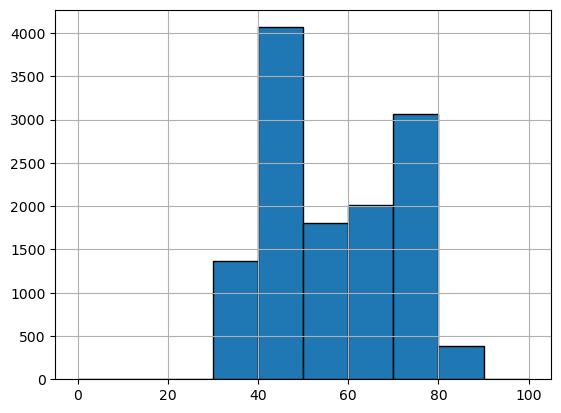

In [21]:
merged_df['length'].hist(bins=range(0, 101, 10), edgecolor='black')

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

RF_selected_df = pd.read_csv(os.path.join(root_dir, 'IL23_RF_XMPNN_selected.csv'))
BC_selected_df = pd.read_csv(os.path.join(root_dir, 'IL23_BC_XMPNN_selected.csv'))
print(f"RF selected sequences: {len(RF_selected_df)}")
print(f"BC selected sequences: {len(BC_selected_df)}")

RF selected sequences: 14390
BC selected sequences: 12700


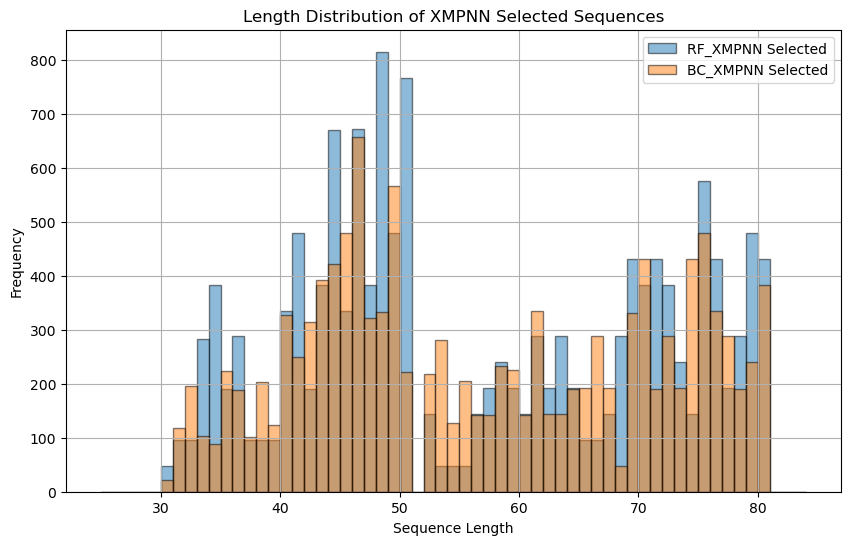

In [ ]:
# plot the length distribution of the sequences
plt.figure(figsize=(10, 6))
plt.hist(RF_selected_df['length'], bins=range(25, 85, 1), alpha=0.5, label='RF_XMPNN Selected', edgecolor='black')
plt.hist(BC_selected_df['length'], bins=range(25, 85, 1), alpha=0.5, label='BC_XMPNN Selected', edgecolor='black')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Length Distribution of XMPNN Selected Backbones')
plt.legend()
plt.grid()
plt.show()

In [9]:
final_L50.to_csv(os.path.join("/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/IL23_BC_XMPNN/", 'IL23_BC_XMPNN_500-1000.csv'), index=False)

In [10]:
# Define the number of slices
N = 2  # Change this to the desired number of slices
fpath = "/Users/liyao/Documents/Xtalpi_Intern/AFdesign_proj/IL23-IL23R_binder_design/designs/IL23_BC_XMPNN/IL23_BC_XMPNN_500-1000.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(fpath)

# Calculate the size of each slice
slice_size = len(df) // N

# Create a list to hold the slices
slices = []

# Split the DataFrame into N slices
for i in range(N):
    start_index = i * slice_size
    # For the last slice, include any remaining rows
    if i == N - 1:
        end_index = len(df)
    else:
        end_index = start_index + slice_size
    slices.append(df.iloc[start_index:end_index])

# Now `slices` contains N DataFrames
# You can store them as separate CSV files if needed
for idx, slice_df in enumerate(slices):
    new_fpath = fpath.replace(".csv", f"_slice_{idx + 1}.csv")
    slice_df.to_csv(new_fpath, index=False)
